In [221]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas
import xarray
import cftime

In [222]:
datapath = 'om_nino34_monthly.nc'
nino34 = xarray.open_dataset(datapath, decode_times = False)
nino34

/Users/paulag/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'areacello' has multiple fill values {-1e+34, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


<xarray.Dataset>
Dimensions:         (bounds: 2, month: 12, time: 720)
Coordinates:
  * time            (time) float64 8.762e+04 8.764e+04 ... 1.095e+05 1.095e+05
Dimensions without coordinates: bounds, month
Data variables:
    nino34          (time) float64 ...
    time_bnds       (time, bounds) float64 ...
    areacello       float32 ...
    days_per_month  (month) int32 ...

<xarray.DataArray 'nino34' (time: 720)>
array([25.2202  , 26.206186, 27.558783, ..., 25.63419 , 25.188877, 25.02302 ])
Coordinates:
  * time     (time) float64 8.762e+04 8.764e+04 ... 1.095e+05 1.095e+05
Attributes:
    units:    days


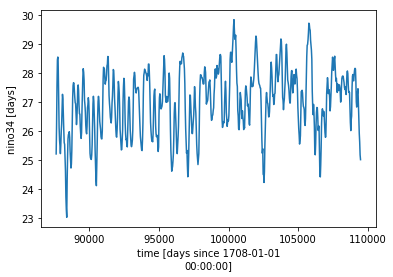

In [224]:
print(nino34['nino34'])
nino34['nino34'].plot();

In [181]:
def ONI(nino34, m = 3):
    oni = nino34 + 0
    length = nino34.shape[0]
    for i in range(length):
        oni.values[i] = np.mean(nino34[max(0, (i - m + 1)) : min((i + 1), length)])
    return oni

In [182]:
oni = ONI(nino34['nino34'])

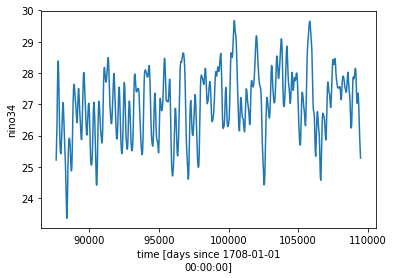

In [183]:
oni.plot()
plt.show()

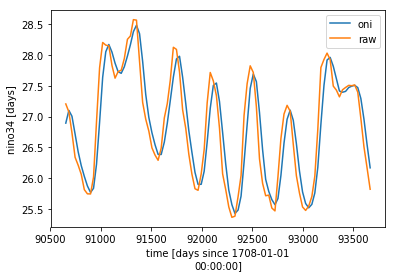

In [205]:
oni[100:200].plot(label = "oni")
nino34['nino34'][100:200].plot(label = "raw")
plt.legend();

In [185]:
def climatology(nino34):
    clm = np.zeros(12)
    for month in range(12):
        section = [12 * i + month for i in range(nino34.shape[0] // 12)]
        clm[month] = np.mean(nino34[section])
    return clm

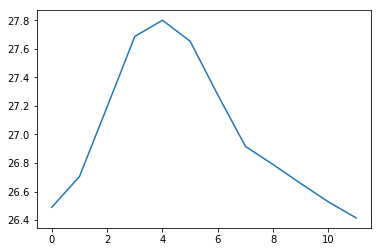

In [186]:
clm = climatology(nino34['nino34'])
plt.plot(nino34['month'], clm)
plt.show()

In [187]:
def SST_anomaly(nino34, clm):
    anm = nino34 + 0
    length = nino34.shape[0]
    for i in range(length):
        anm.values[i] = nino34[i] - clm[i % 12]
    return anm

In [188]:
def rbplot(x, y, threshold=0.5):
    plt.plot(x, y, 'k')
    plt.plot([x[0],x[-1]], [0, 0], 'k--')
    plt.plot([x[0],x[-1]], [threshold, threshold], 'r--')
    plt.plot([x[0],x[-1]], [-threshold, -threshold], 'b--')
    plt.fill_between(x, threshold, y, color='red', where=y>=threshold, interpolate=True)
    plt.fill_between(x, -threshold, y, color='blue', where=y<=-threshold, interpolate=True)

(1950, 2020)

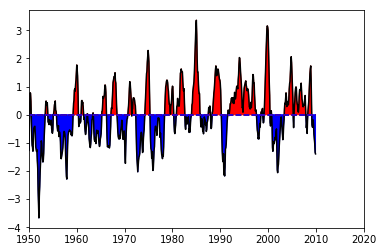

In [231]:
anm = SST_anomaly(nino34['nino34'], clm)
rbplot(np.arange(720) / 12 + 1950, anm.values, threshold = 0)
plt.xlim(1950, 2020)

(1950, 2020)

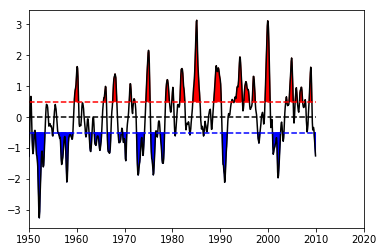

In [233]:
oanm = ONI(anm)
rbplot(np.arange(720) / 12 + 1950, oanm.values, threshold = 0.5)
plt.xlim(1950, 2020)

In [234]:
oni.values

array([25.2202  , 25.713193, 26.328389, ..., 25.930213, 25.584138, 25.282029])